In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load Data
# from google.colab import files
# uploaded = files.upload()

Merged_data = pd.read_excel('Merged_data.xlsx')

In [3]:
Merged_data.interpolate(method='linear',inplace=True)
Merged_data.set_index('Date',inplace=True)

In [4]:
Merged_data.index

DatetimeIndex(['2020-12-31 15:00:00', '2020-12-31 16:00:00',
               '2020-12-31 17:00:00', '2020-12-31 18:00:00',
               '2020-12-31 19:00:00', '2020-12-31 20:00:00',
               '2020-12-31 21:00:00', '2020-12-31 22:00:00',
               '2020-12-31 23:00:00', '2021-01-01 00:00:00',
               ...
               '2023-12-30 00:00:00', '2023-12-30 01:00:00',
               '2023-12-30 02:00:00', '2023-12-30 03:00:00',
               '2023-12-30 04:00:00', '2023-12-30 05:00:00',
               '2023-12-30 06:00:00', '2023-12-30 07:00:00',
               '2023-12-30 08:00:00', '2023-12-30 09:00:00'],
              dtype='datetime64[ns]', name='Date', length=26251, freq=None)

In [5]:
len(Merged_data)

26251

In [6]:
Merged_data.head()

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),et0_fao_evapotranspiration (mm),wind_speed_10m (km/h),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),Turbidity
Date,,,,,,,,,,
2020-12-31 15:00:00,4.0,78,0.0,0.05,9.8,20.5,4.4,0.391,55,0.430411
2020-12-31 16:00:00,3.4,85,0.0,0.02,5.6,18.4,4.1,0.391,25,0.522836
2020-12-31 17:00:00,1.5,94,0.0,0.01,7.3,9.7,3.5,0.390,3,0.512069
2020-12-31 18:00:00,0.8,95,0.0,0.00,7.1,9.4,2.9,0.389,0,0.450545
2020-12-31 19:00:00,-0.1,97,0.0,0.00,8.4,10.4,2.3,0.388,0,0.405494


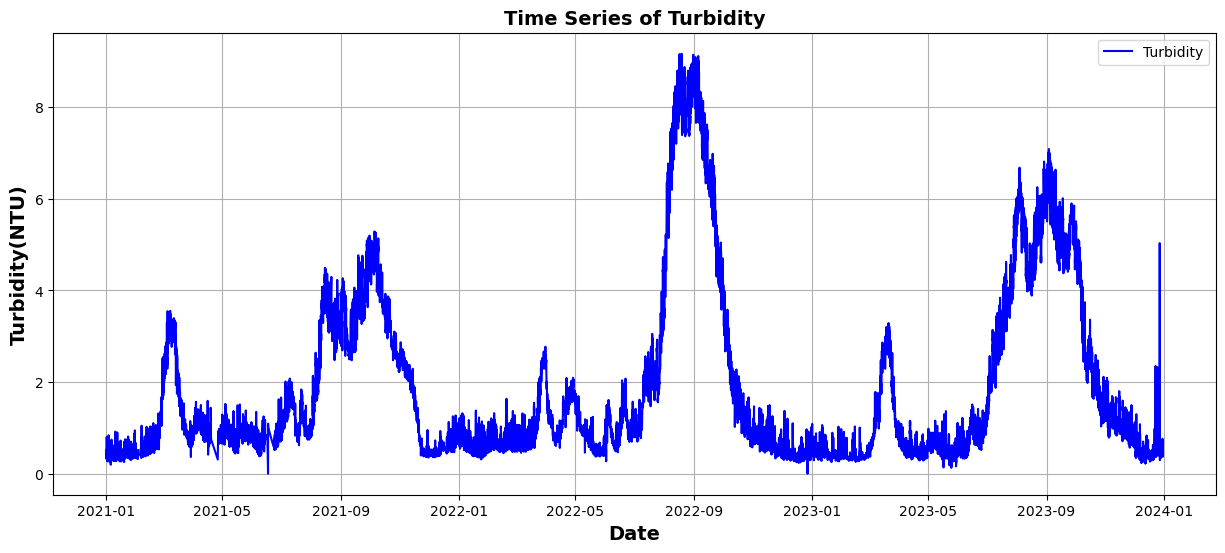

In [7]:
# Plot the time series
plt.figure(figsize=(15, 6))
plt.plot(Merged_data.index, Merged_data['Turbidity'], label='Turbidity',color='blue')
plt.title('Time Series of Turbidity',fontsize=14,fontweight='bold')
plt.xlabel('Date',fontsize=14,fontweight='bold')
plt.ylabel('Turbidity(NTU)',fontsize=14,fontweight='bold')
plt.grid()
plt.legend()
plt.show()

In [8]:
target_col = Merged_data['Turbidity']

In [9]:
target_column = Merged_data['Turbidity']

In [10]:
features_column = Merged_data.drop(columns=['Turbidity'])

In [11]:
features_column

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),et0_fao_evapotranspiration (mm),wind_speed_10m (km/h),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²)
Date,,,,,,,,,
2020-12-31 15:00:00,4.0,78,0.0,0.05,9.8,20.5,4.4,0.391,55
2020-12-31 16:00:00,3.4,85,0.0,0.02,5.6,18.4,4.1,0.391,25
2020-12-31 17:00:00,1.5,94,0.0,0.01,7.3,9.7,3.5,0.390,3
2020-12-31 18:00:00,0.8,95,0.0,0.00,7.1,9.4,2.9,0.389,0
2020-12-31 19:00:00,-0.1,97,0.0,0.00,8.4,10.4,2.3,0.388,0
...,...,...,...,...,...,...,...,...,...
2023-12-30 05:00:00,6.9,90,0.0,0.01,21.5,37.4,7.3,0.399,0
2023-12-30 06:00:00,6.9,90,0.0,0.01,21.4,36.7,7.1,0.399,0
2023-12-30 07:00:00,6.7,91,0.0,0.00,19.0,36.4,7.0,0.398,0


In [12]:
# Normalize features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features_column)

In [13]:
# Normalize the target variable
target_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = target_scaler.fit_transform(target_column.values.reshape(-1, 1))

In [14]:
#  Create time series data (X, y)
def create_time_series_data(X, y, time_steps):
    X_data, y_data = [], []
    for i in range(len(X) - time_steps):
        X_data.append(X[i:i + time_steps])
        y_data.append(y[i + time_steps])
    return np.array(X_data), np.array(y_data)

time_steps = 48  # Number of time steps to look back

X, y = create_time_series_data(scaled_features, scaled_target, time_steps)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [16]:
#  Build the LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))  # Output layer for predicting turbidity

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - loss: 0.0293 - val_loss: 0.0406
Epoch 2/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 0.0222 - val_loss: 0.0387
Epoch 3/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0190 - val_loss: 0.0364
Epoch 4/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0160 - val_loss: 0.0336
Epoch 5/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0140 - val_loss: 0.0289
Epoch 6/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0110 - val_loss: 0.0297
Epoch 7/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0112 - val_loss: 0.0396
Epoch 8/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0110 - val_loss: 0.0457
Epoch 9/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0099 - val_loss: 0.0449
Epoch 10/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0091 - val_loss: 0.0379
Epoch 11/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0082 - val_loss: 0.0404
Epoch 12/20
656/656 ━━━━━━━━━━

In [18]:
# Evaluate the model and make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = target_scaler.inverse_transform(predictions)
y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1))
# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')


164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Mean Squared Error: 2.7471579584580215
Mean Absolute Error: 1.1623749956123277
R^2 Score: 0.33622008605387854


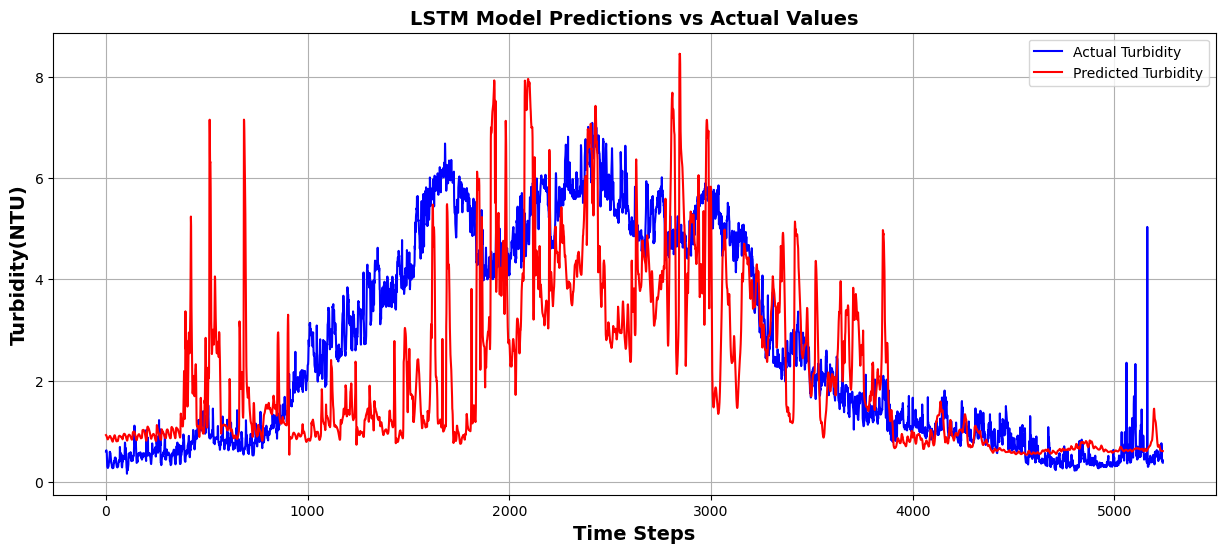

In [19]:
# Plot the predictions vs actual values
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual Turbidity', color='blue')
plt.plot(predictions, label='Predicted Turbidity', color='red')
plt.title('LSTM Model Predictions vs Actual Values', fontsize=14, fontweight='bold')
plt.xlabel('Time Steps', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity(NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid()
plt.show()


In [198]:
def load_data(file_path):
  df = pd.read_excel(file_path)
  df.set_index('Date',inplace=True)
  return df

In [199]:
def preprocess_data(df, target_col):
    """
    Prepare data for LSTM:
    - Separate features and target
    - Normalize data
    """
    # Handle missing values
    df.interpolate(method='linear',inplace=True)


    # Separate features and target
    features = df.drop(columns=[target_col]).values
    target = df[target_col].values.reshape(-1, 1)

    # Normalize data (0-1 range)
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()

    features_scaled = feature_scaler.fit_transform(features)
    target_scaled = target_scaler.fit_transform(target)

    # Combine features and target
    data_scaled = np.hstack((features_scaled, target_scaled))

    return data_scaled, feature_scaler, target_scaler



In [200]:
# 3. Create Sequences
def create_sequences(data, n_steps):
    """
    Create input sequences and corresponding outputs
    data: Normalized numpy array with features and target
    n_steps: Number of time steps to look back
    """
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :])  # All features including target
        y.append(data[i+n_steps, -1])   # Target is always last column
    return np.array(X), np.array(y)


In [201]:
# 4. Train-Test Split
def temporal_train_test_split(X, y, test_size=0.2):
    """Split data sequentially while maintaining temporal order"""
    split_idx = int(len(X) * (1 - test_size))
    X_train, y_train = X[:split_idx], y[:split_idx]
    X_test, y_test = X[split_idx:], y[split_idx:]
    return X_train, y_train, X_test, y_test

In [202]:

# 5. Build LSTM Model
def build_lstm_model(input_shape):
    """Create LSTM model architecture"""
    model = Sequential([
        LSTM(100, activation='relu', return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


In [203]:
# 6. Main Workflow
def main():
    # Configuration
    FILE_PATH = 'your_data.csv'  # Replace with your data file
    TARGET_COL = 'Turbidity'    # Your target column
    N_STEPS = 24                # Look-back window size
    TEST_SIZE = 0.2             # Proportion for test set
    EPOCHS = 20
    BATCH_SIZE = 32

In [205]:
df = load_data('Merged_data.xlsx')

data_scaled, feature_scaler, target_scaler = preprocess_data(df, 'Turbidity')

n_features = data_scaled.shape[1] - 1

In [207]:
# 3. Create sequences
X, y = create_sequences(data_scaled, 24)
print(f"Sequences shape - X: {X.shape}, y: {y.shape}")

Sequences shape - X: (26227, 24, 10), y: (26227,)


In [209]:
# 4. Split data
X_train, y_train, X_test, y_test = temporal_train_test_split(X, y, 0.2)


In [210]:
# 5. Build model
model = build_lstm_model((24, n_features + 1))  # +1 for target column

In [212]:
# 6. Train model
history = model.fit(
      X_train, y_train,
      epochs=5,
      batch_size=32,
      validation_data=(X_test, y_test),
      verbose=1
    )


Epoch 1/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - loss: 3.9351e-04 - val_loss: 8.0941e-04
Epoch 2/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - loss: 3.6072e-04 - val_loss: 7.5309e-04
Epoch 3/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - loss: 4.1844e-04 - val_loss: 7.7177e-04
Epoch 4/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - loss: 3.5889e-04 - val_loss: 8.2595e-04
Epoch 5/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - loss: 3.4002e-04 - val_loss: 7.0087e-04


In [213]:
# 7. Evaluate model
y_pred = model.predict(X_test)

# Inverse transform predictions
y_test_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = target_scaler.inverse_transform(y_pred)

# Calculate metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2_score = r2_score(y_test_actual, y_pred_actual)
print(f"\nTest MSE: {mse:.4f}, MAE: {mae:.4f}, R2 Score: {r2_score:.4f}")


164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step

Test MSE: 1.0160, MAE: 0.4236, R2 Score: 0.8208


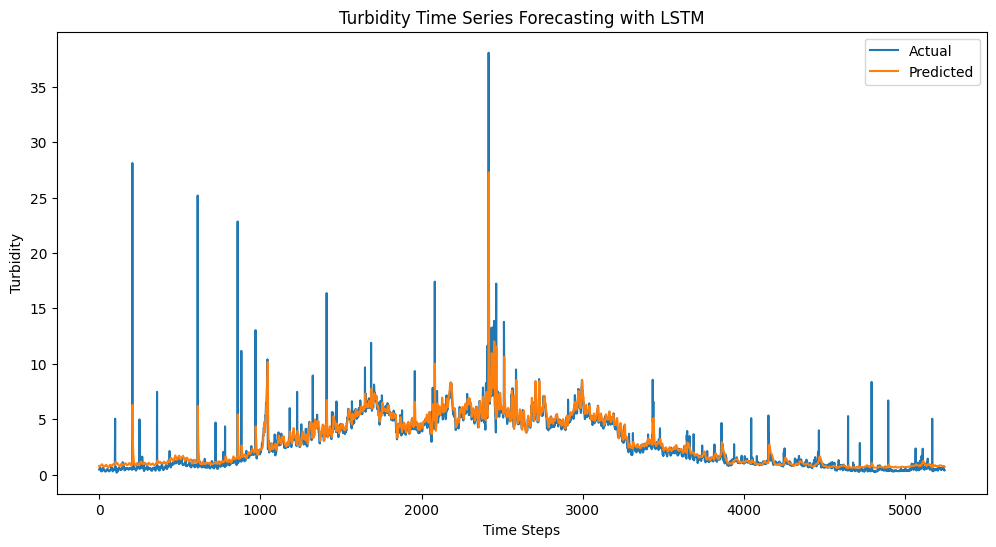

In [215]:
# 8. Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred_actual, label='Predicted')
plt.title('Turbidity Time Series Forecasting with LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Turbidity')
plt.legend()
plt.show()

